In [36]:
# ==============================
# 📊 Librerías de Manipulación de Datos
# ==============================
import pandas as pd
import calendar

# ==============================
# 📊 Visualización de Datos
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns


# ==============================
# ⚡ Machine Learning y Modelado
# ==============================
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# ==============================
# ✅ Guardado del Modelo
# ==============================
import pickle
import os

In [37]:
df_original = pd.read_csv('/workspaces/AK-EA-GG_ProyectoFinalDS-ML/data/raw/loan_dataset_base.csv')

In [38]:
# Convertir 'issue_d' a objetos datetime para una correcta ordenación
df_original['issue_d'] = pd.to_datetime(df_original['issue_d'], format='%b-%Y')

# Ordenar el DataFrame por 'issue_d' en orden descendente (los más recientes primero)
df_sorted = df_original.sort_values(by='issue_d', ascending=False)

# Tomar las primeras 70000 filas (los más recientes)
df_recent = df_sorted.head(70000)

In [39]:
df = df_recent.copy()
df.to_csv("/workspaces/AK-EA-GG_ProyectoFinalDS-ML/data/raw/loan_dataset.csv", index=False)

In [40]:
# Vista inicial
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras filas:")
display(df.head())

# Información sobre tipos de datos y valores nulos
print("\nInformación del dataset:")
df.info()

Dimensiones del dataset: (70000, 27)

Primeras filas:


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
252221,20000.0,36 months,25.49,800.39,E,E4,manager,10+ years,MORTGAGE,60000.0,...,9.0,1.0,10999.0,37.9,14.0,w,INDIVIDUAL,1.0,1.0,"70047 Andrea Shoals\r\nLake Heatherland, CT 29597"
110451,16000.0,36 months,7.49,497.63,A,A4,manager,10+ years,MORTGAGE,80000.0,...,18.0,0.0,43505.0,57.7,36.0,f,INDIVIDUAL,3.0,0.0,"896 Douglas Springs\r\nBrownburgh, IL 48052"
388741,25000.0,60 months,7.99,506.80,A,A5,"Director, National Accounts",10+ years,MORTGAGE,300000.0,...,12.0,0.0,20430.0,38.0,23.0,w,INDIVIDUAL,2.0,0.0,5357 Allen Hills Suite 666\r\nNorth Calebhaven...
73935,2800.0,36 months,13.49,95.01,C,C2,NaN,NaN,MORTGAGE,102000.0,...,11.0,0.0,25593.0,78.5,19.0,w,INDIVIDUAL,3.0,0.0,USNV Riley\r\nFPO AE 30723
200177,30000.0,60 months,25.49,889.18,E,E4,General Manager,4 years,MORTGAGE,82000.0,...,8.0,0.0,10197.0,69.8,24.0,w,INDIVIDUAL,2.0,0.0,"5727 Manning Cliff\r\nSallychester, KY 30723"



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 252221 to 356074
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             70000 non-null  float64       
 1   term                  70000 non-null  object        
 2   int_rate              70000 non-null  float64       
 3   installment           70000 non-null  float64       
 4   grade                 70000 non-null  object        
 5   sub_grade             70000 non-null  object        
 6   emp_title             65897 non-null  object        
 7   emp_length            65884 non-null  object        
 8   home_ownership        70000 non-null  object        
 9   annual_inc            70000 non-null  float64       
 10  verification_status   70000 non-null  object        
 11  issue_d               70000 non-null  datetime64[ns]
 12  loan_status           70000 non-null  object   

In [41]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())


Estadísticas descriptivas:


,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,70000.000000,70000.000000,70000.000000,7.000000e+04,70000,70000.000000,70000.000000,70000.000000,7.000000e+04,69957.000000,70000.000000,70000.000000,70000.000000
mean,14930.873571,13.454935,447.675277,7.973016e+04,2015-12-05 18:36:37.028571392,18.798681,12.000114,0.241643,1.671999e+04,48.437556,26.491229,1.794943,0.154557
min,1000.000000,5.320000,30.120000,0.000000e+00,2015-07-01 00:00:00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,9.760000,250.290000,4.900000e+04,2015-09-01 00:00:00,11.910000,8.000000,0.000000,5.556000e+03,29.300000,17.000000,0.000000,0.000000
50%,13000.000000,12.880000,382.550000,6.800000e+04,2015-11-01 00:00:00,18.020000,11.000000,0.000000,1.081900e+04,47.800000,25.000000,1.000000,0.000000
75%,20000.000000,16.590000,602.300000,9.500000e+04,2016-03-01 00:00:00,24.830000,15.000000,0.000000,1.995500e+04,67.500000,34.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,7.600000e+06,2016-12-01 00:00:00,9999.000000,57.000000,86.000000,1.023940e+06,152.500000,151.000000,32.000000,8.000000
std,9027.197402,4.855157,269.312084,7.811552e+04,NaN,39.273822,5.675922,0.690384,2.495247e+04,25.081014,12.485598,2.014209,0.405304


In [42]:
# Porcentajes de la variable objetivo
porcentaje_objetivo = (df["loan_status"].value_counts() / len(df)) * 100
print(f"{porcentaje_objetivo}")

loan_status
Fully Paid     80.705714
Charged Off    19.294286
Name: count, dtype: float64


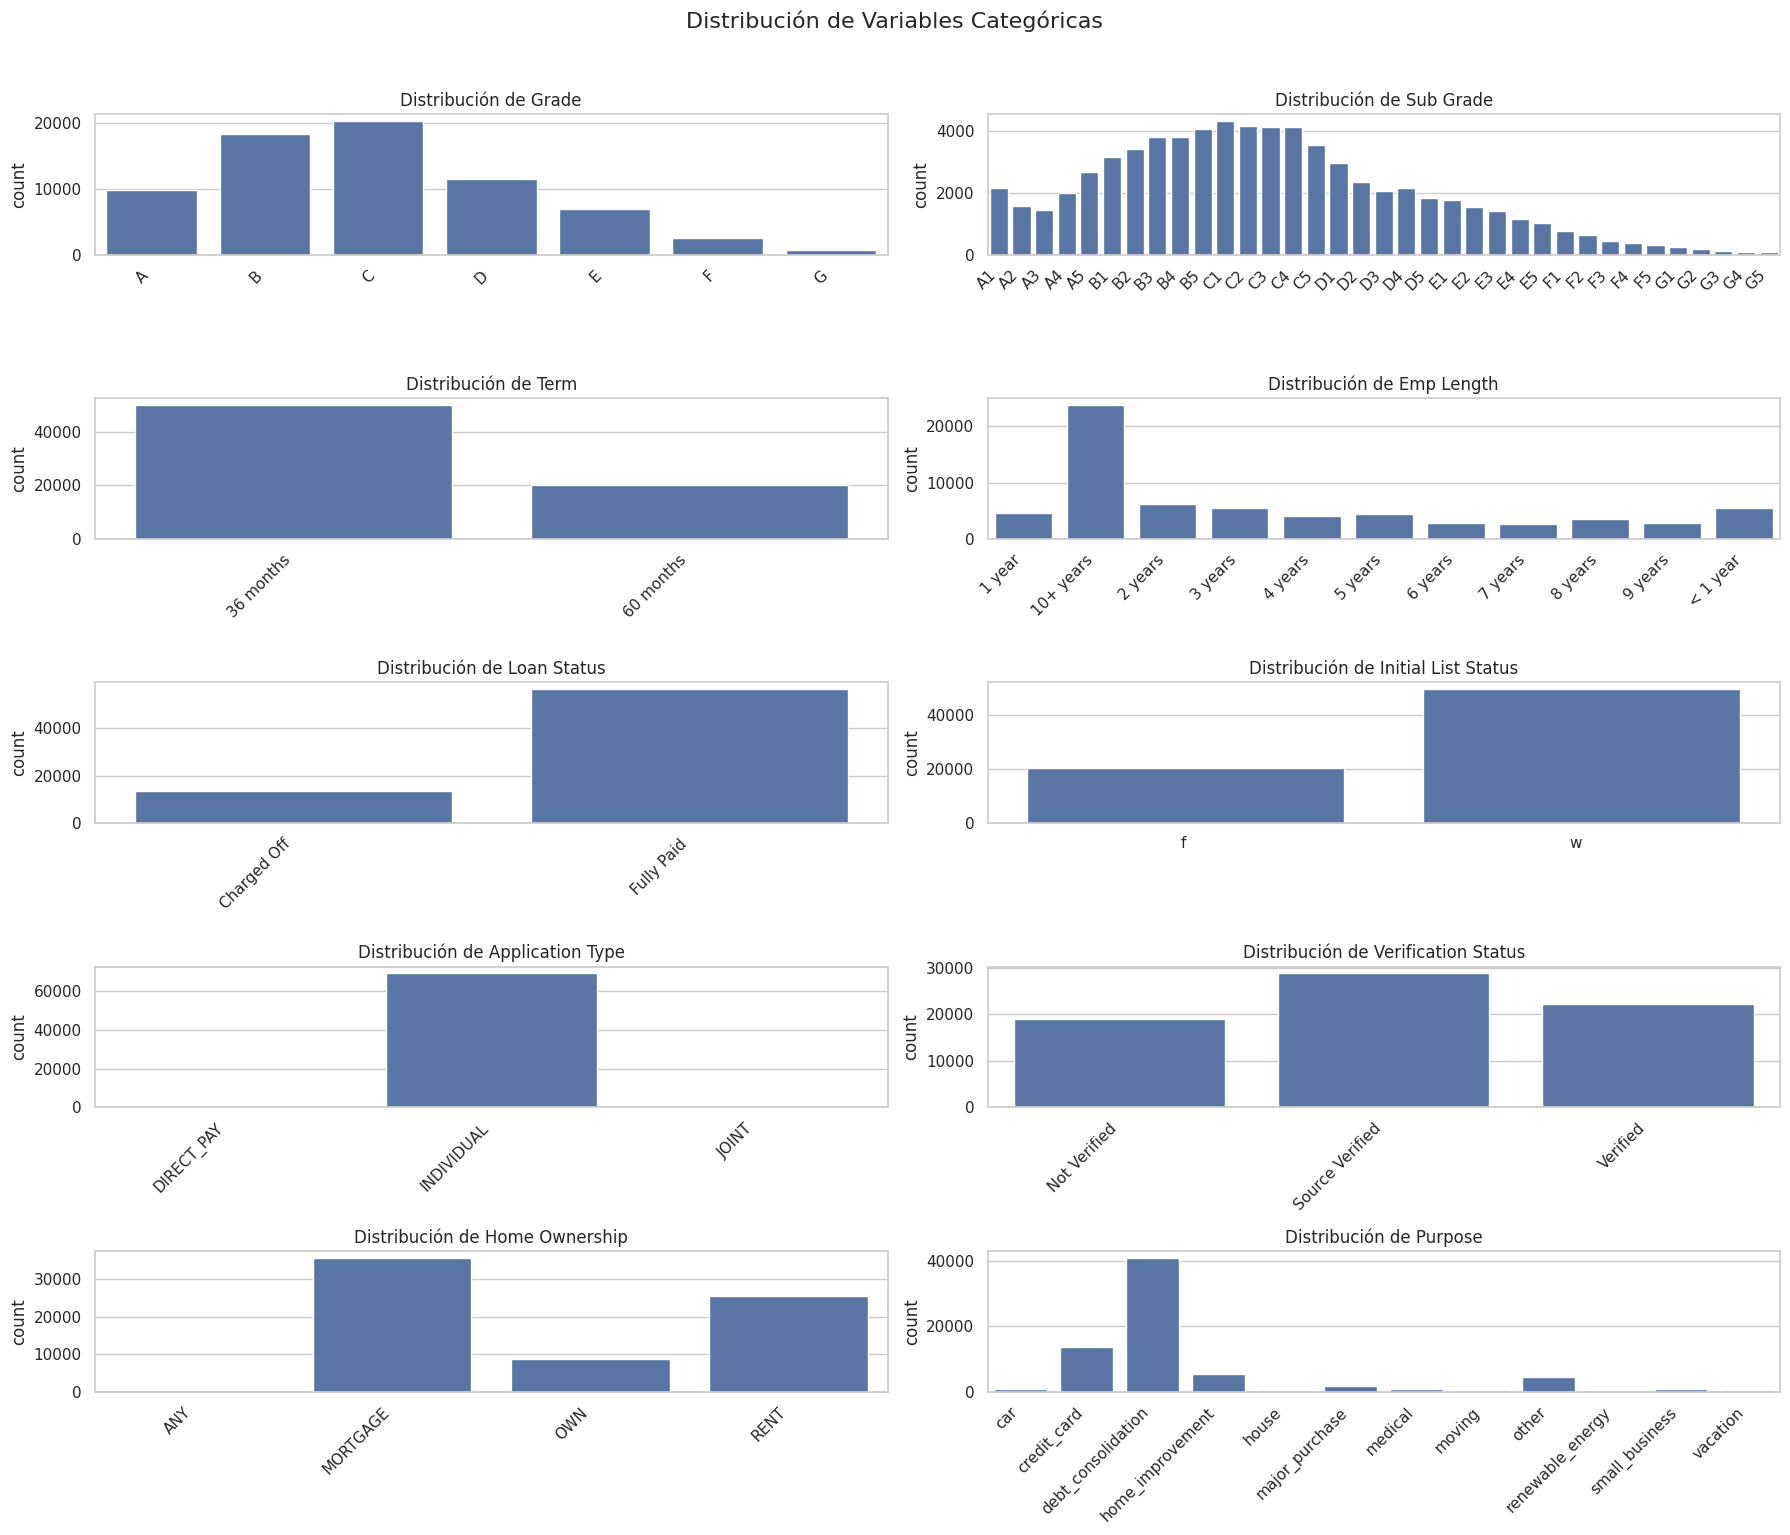

In [43]:
sns.set(style="whitegrid") 
plt.rcParams['font.size'] = 10 

fig, axes = plt.subplots(5, 2, figsize=(18, 15))
fig.suptitle('Distribución de Variables Categóricas', y=1.02, fontsize=16)

variables_cat = [
    "grade", "sub_grade", 
    "term", "emp_length", 
    "loan_status", "initial_list_status",
    "application_type", "verification_status",
    "home_ownership", "purpose"
    
]

for ax, var in zip(axes.flatten(), variables_cat):
    order = sorted(df[var].dropna().unique())
    sns.countplot(ax=ax, data=df, x=var, order=order)
    ax.set_title(f'Distribución de {var.replace("_", " ").title()}')
    ax.set_xlabel('')
    
    if df[var].nunique() > 5 or any(len(str(x)) > 4 for x in df[var].unique()):
        ax.tick_params(axis='x', rotation=45)
    
    plt.setp(ax.get_xticklabels(), ha="right")

plt.tight_layout()
plt.show()

In [44]:
# conversion de variables categóricas por mascara
dict_emp_length = {"< 1 year":0, "1 year":1, 
                   "2 years":2, "3 years":3, 
                   "4 years":4, "5 years":5, 
                   "6 years":6, "7 years":7, 
                   "8 years":8, "9 years":9, 
                   "10+ years":10}

df["loan_status"] = df["loan_status"].map({"Fully Paid":0, "Charged Off":1})
df["initial_list_status"] = df["initial_list_status"].map({"w":0, "f":1})
df["emp_length"] = df["emp_length"].map(dict_emp_length)

In [45]:
# conversion de term con split y numeric
df['term'] = df['term'].str.split().str[0]
df['term'] = pd.to_numeric(df['term'])

In [46]:
# extraccion del zip code de la columna address
df['zip_code'] = df['address'].str.extract(r'\s(\d{5})(?:-\d{4})?$')
df['zip_code'] = pd.to_numeric(df['zip_code'])
df['zip_code'].head()

252221    29597
110451    48052
388741    22690
73935     30723
200177    30723
Name: zip_code, dtype: int64

In [47]:
df['zip_code'].value_counts()

zip_code
70466    10118
30723     9982
22690     9959
48052     9877
813       8222
5113      8113
29597     7970
11650     1961
93700     1937
86630     1861
Name: count, dtype: int64

In [48]:
df[['earliest_cr_line_month', 'earliest_cr_line_year']] = df['earliest_cr_line'].str.split('-', expand=True)


# Crear un diccionario de abreviaturas a números
meses = {month: index for index, month in enumerate(calendar.month_abbr) if month}

# Mapear los meses
df['earliest_cr_line_year'] = df['earliest_cr_line_year'].astype(int)
df['earliest_cr_line_month'] = df['earliest_cr_line_month'].map(meses)

In [49]:
# Crear earliest_cr_line_scaled: año + fracción del mes
df['earliest_cr_line_scaled'] = df['earliest_cr_line_year'] + (df['earliest_cr_line_month'] - 1) / 12

In [50]:
# Verificar resultado
print("\n✅ Ejemplos de earliest_cr_line_scaled:")
print(df[['earliest_cr_line_year', 'earliest_cr_line_month', 'earliest_cr_line_scaled']].head())


✅ Ejemplos de earliest_cr_line_scaled:
        earliest_cr_line_year  earliest_cr_line_month  earliest_cr_line_scaled
252221                   2007                       6              2007.416667
110451                   1998                       9              1998.666667
388741                   1991                       1              1991.000000
73935                    1983                       1              1983.000000
200177                   2007                       1              2007.000000


In [51]:
# conversion de issue_d a datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])

# separar columnas en month y year
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

In [52]:
# Crear issue_d_scaled: año + fracción del mes
df['issue_d_scaled'] = df['issue_year'] + (df['issue_month'] - 1) / 12

# Verificar resultado
print("\n✅ Ejemplos de issue_d_scaled:")
print(df[['issue_year', 'issue_month', 'issue_d_scaled']].head())


✅ Ejemplos de issue_d_scaled:
        issue_year  issue_month  issue_d_scaled
252221        2016           12     2016.916667
110451        2016           12     2016.916667
388741        2016           12     2016.916667
73935         2016           12     2016.916667
200177        2016           12     2016.916667


In [53]:
# Densidad crediticia
# Cuántas cuentas totales hay en relación con cuentas activas (abiertas). 
# Ayuda a evaluar el historial frente al uso actual.
# Evitar división por cero

df['densidad_crediticia'] = df.apply(
    lambda row: row['total_acc'] / row['open_acc'] if row['open_acc'] != 0 else 0,
    axis=1
)

In [54]:
# dropeo de columnas innecesarias

df = df.drop("grade", axis=1)
df = df.drop("title", axis=1)
df = df.drop("earliest_cr_line", axis=1)
df = df.drop("application_type", axis=1)
df = df.drop("address", axis=1)
df = df.drop("issue_d", axis=1)
df = df.drop("issue_month", axis=1)
df = df.drop("issue_year", axis=1)
df = df.drop("emp_title", axis=1)
df = df.drop("earliest_cr_line_year", axis=1)
df = df.drop("earliest_cr_line_month", axis=1)
df = df.drop("open_acc", axis=1)
df = df.drop("total_acc", axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 252221 to 356074
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                70000 non-null  float64
 1   term                     70000 non-null  int64  
 2   int_rate                 70000 non-null  float64
 3   installment              70000 non-null  float64
 4   sub_grade                70000 non-null  object 
 5   emp_length               65884 non-null  float64
 6   home_ownership           70000 non-null  object 
 7   annual_inc               70000 non-null  float64
 8   verification_status      70000 non-null  object 
 9   loan_status              70000 non-null  int64  
 10  purpose                  70000 non-null  object 
 11  dti                      70000 non-null  float64
 12  pub_rec                  70000 non-null  float64
 13  revol_bal                70000 non-null  float64
 14  revol_util           

In [56]:
df_final = df.copy()

In [57]:
# Seleccionar columnas numéricas
numericas_float = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'pub_rec', 'revol_bal', 'revol_util',
    'mort_acc', 'pub_rec_bankruptcies'
]

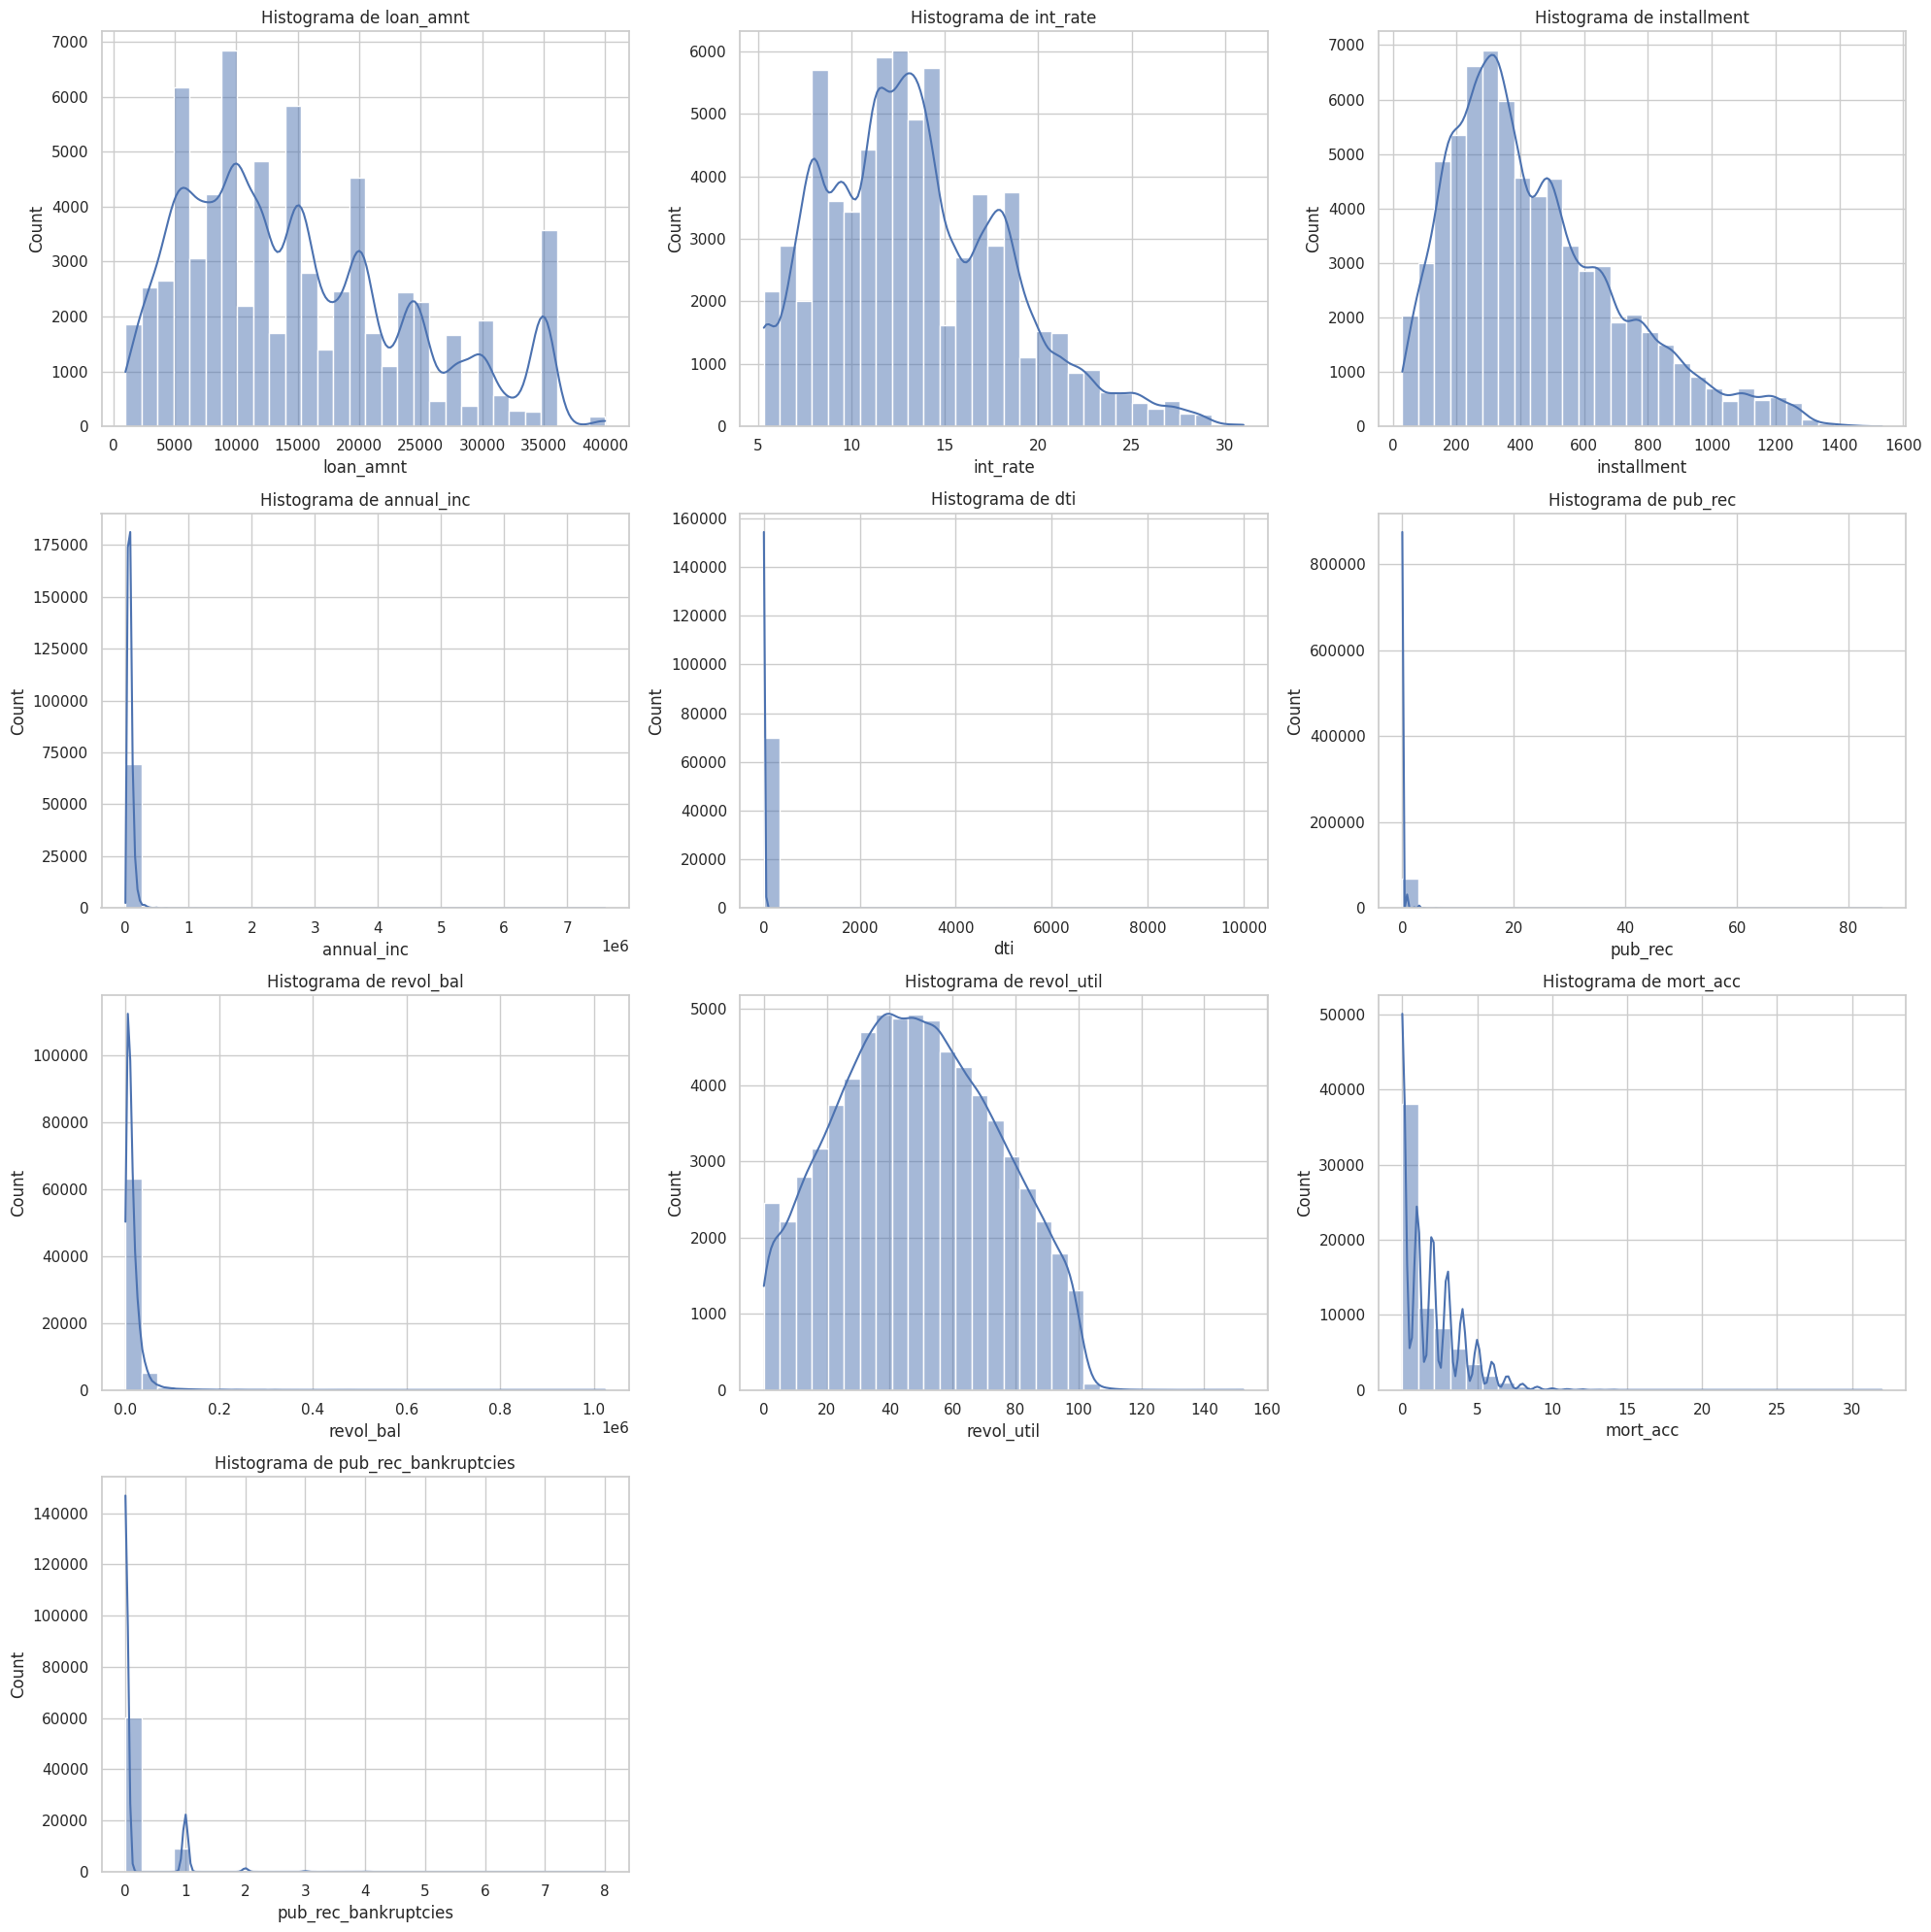

In [58]:
# Histograma de variables numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.histplot(df_final[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

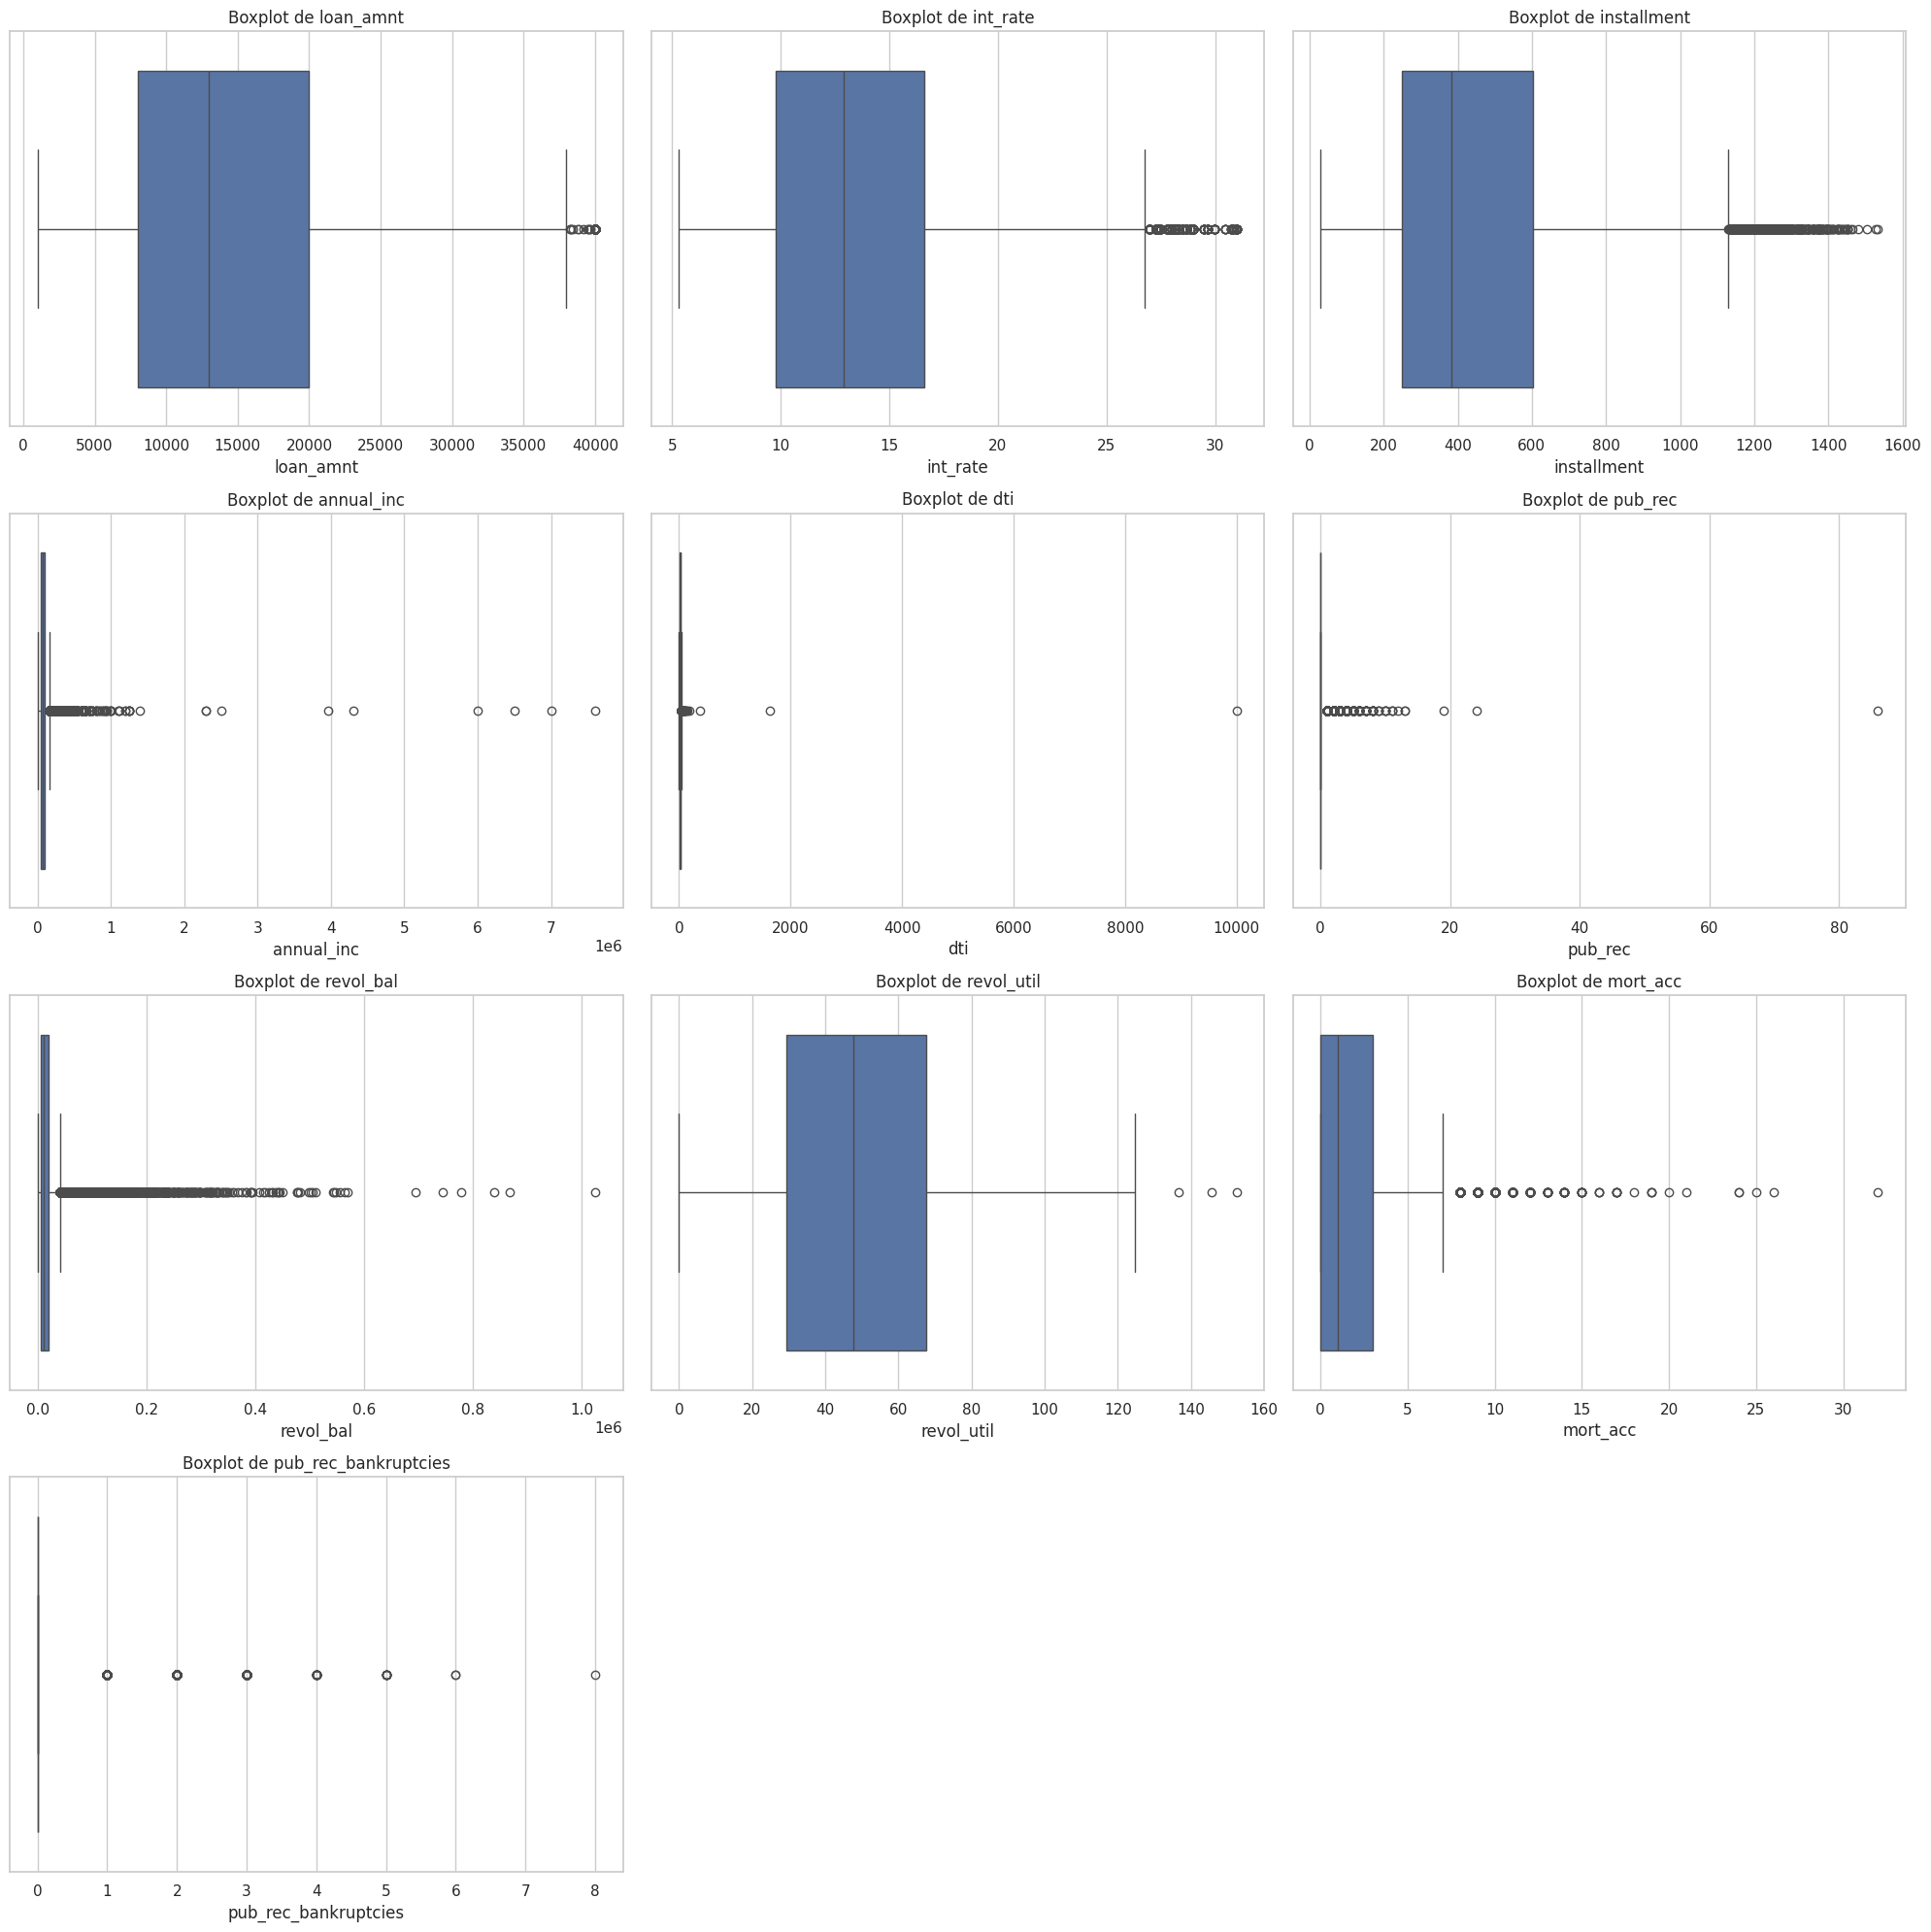

In [59]:
# Boxplots para las variables numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

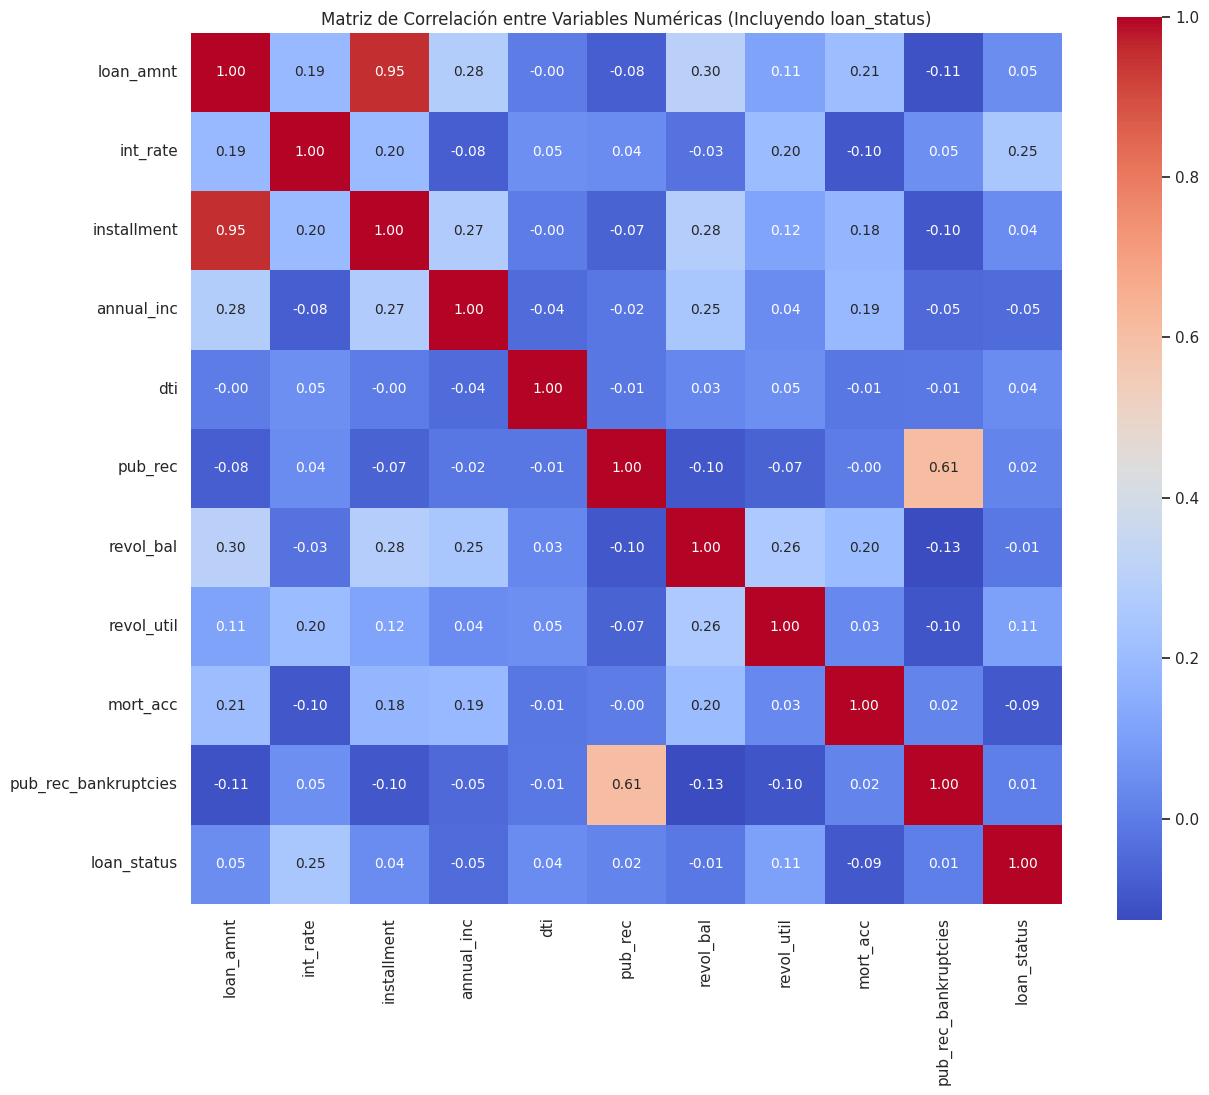

In [60]:
# Relación entre variables numéricas (float64 + loan_status)
# Agregar la variable objetivo a la lista
numericas_float_con_objetivo = numericas_float + ['loan_status']

# Calcular la matriz de correlación incluyendo la variable objetivo
corr_matrix = df_final[numericas_float_con_objetivo].corr()

# Mostrar el mapa de calor de la correlación
plt.figure(figsize=(13, 11))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación entre Variables Numéricas (Incluyendo loan_status)')
plt.tight_layout()
plt.show()

In [61]:
# Lista de variables categóricas originales
cat_vars = [
    "sub_grade", "term", "emp_length", "home_ownership", 
    "verification_status", "purpose", "initial_list_status"
]

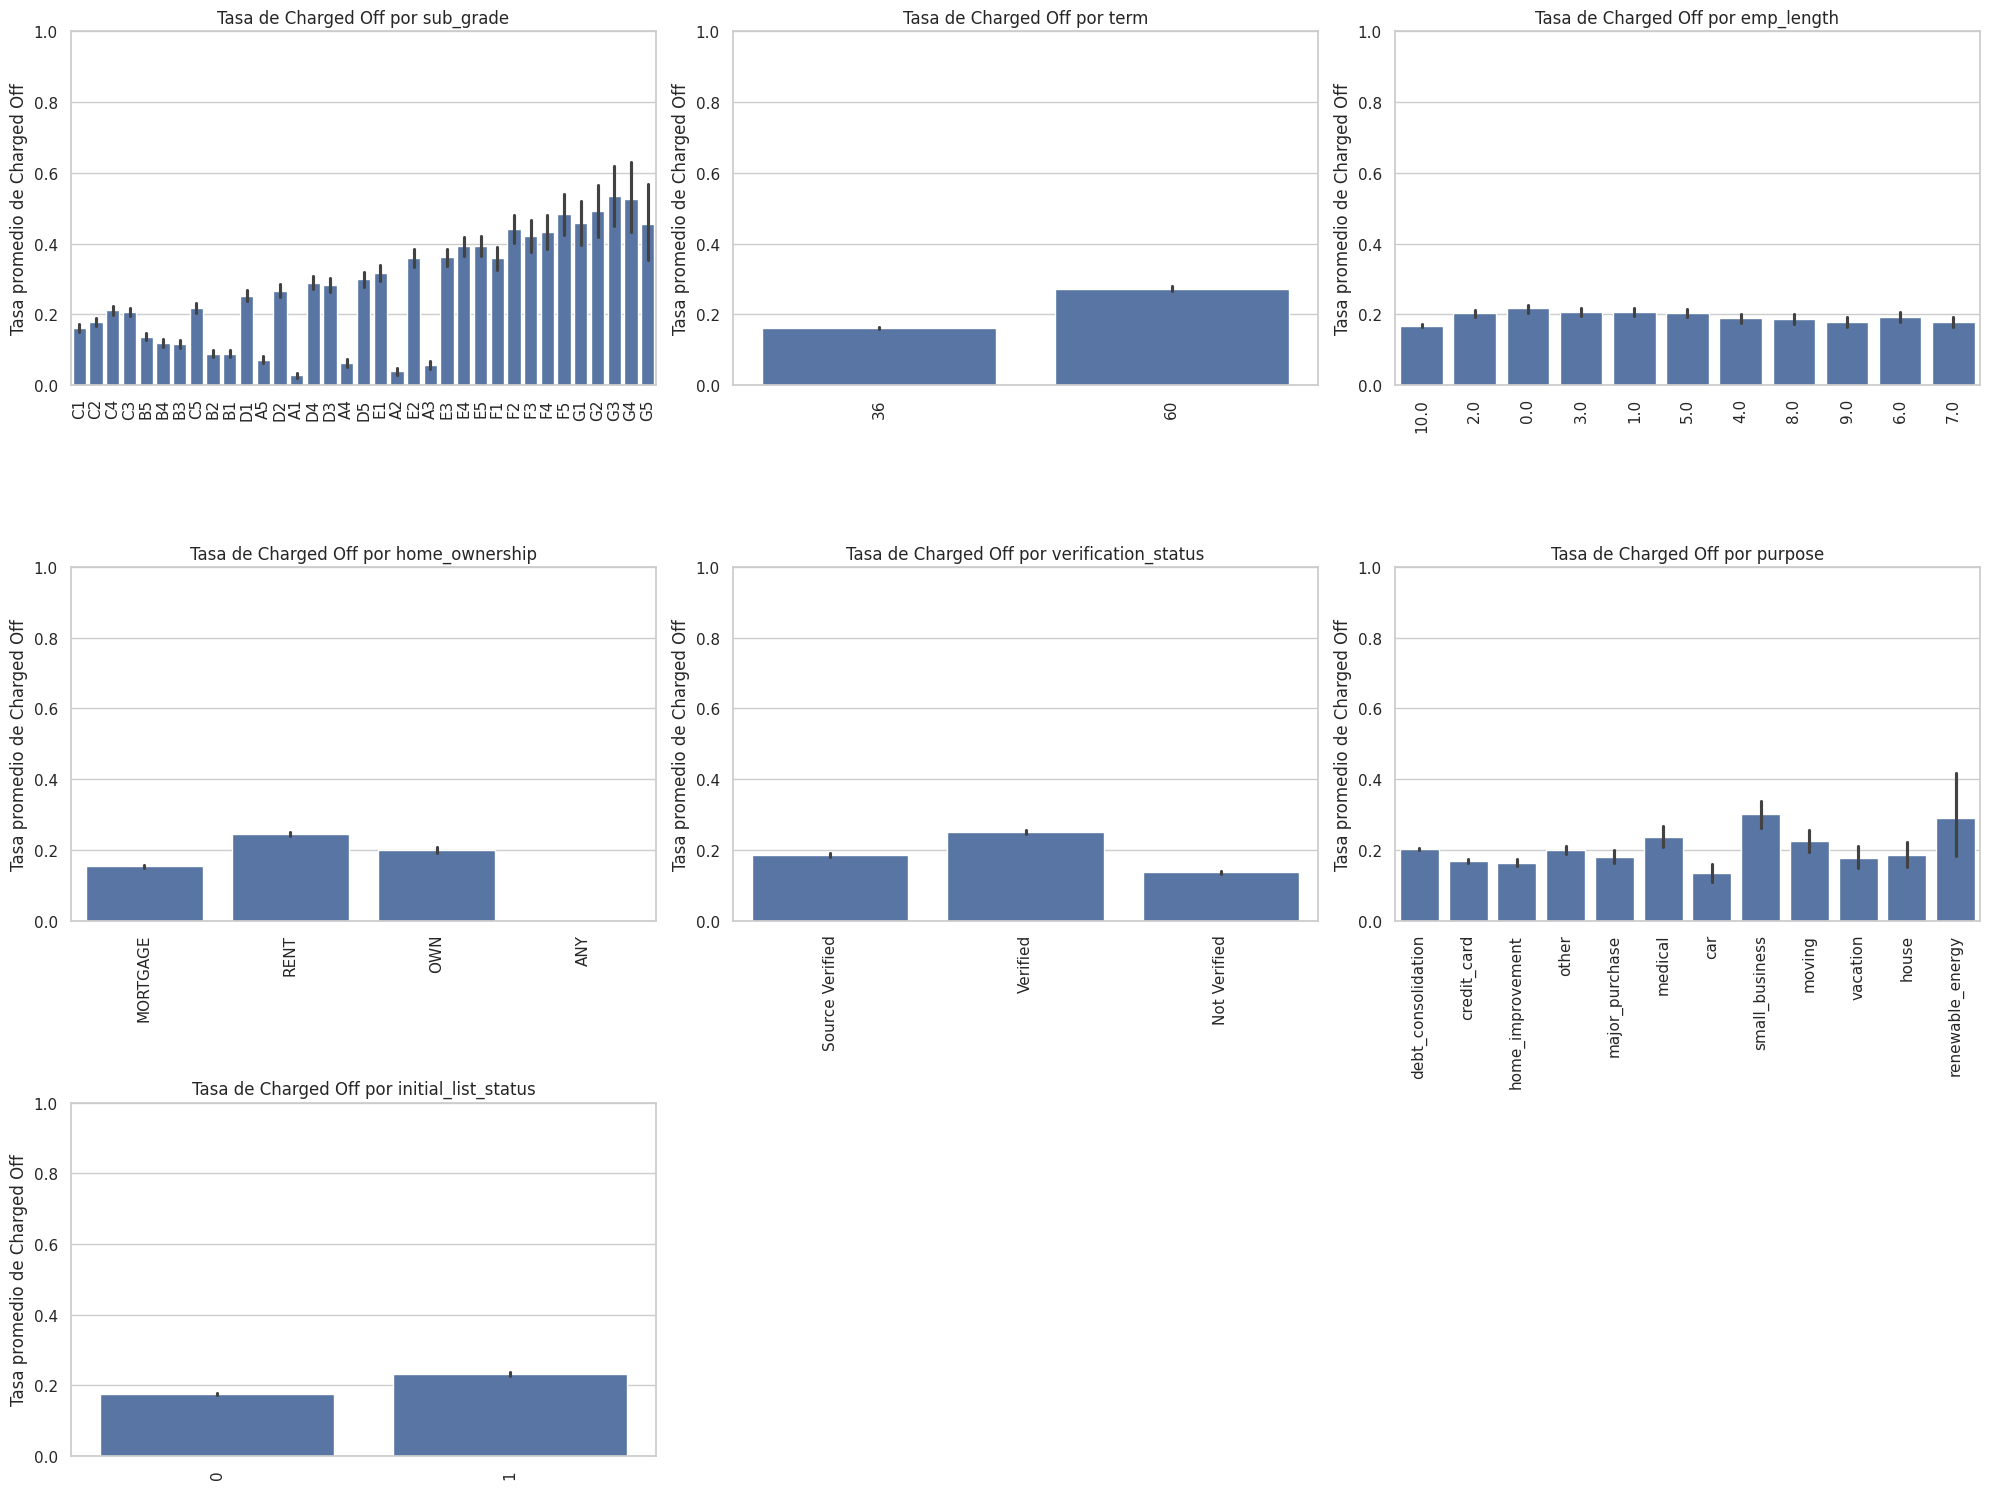

In [62]:
# Relación entre variables categóricas y la variable objetivo.
# Usamos el DataFrame original antes del one-hot establecido como 'df'

# Graficar proporción de Charged Off por categoría
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_vars):
    plt.subplot(3, 3, i + 1)
    orden = df[col].value_counts().index
    sns.barplot(data=df, x=col, y="loan_status", order=orden)
    plt.xticks(rotation=90)
    plt.title(f'Tasa de Charged Off por {col}')
    plt.ylabel('Tasa promedio de Charged Off')
    plt.xlabel('')
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

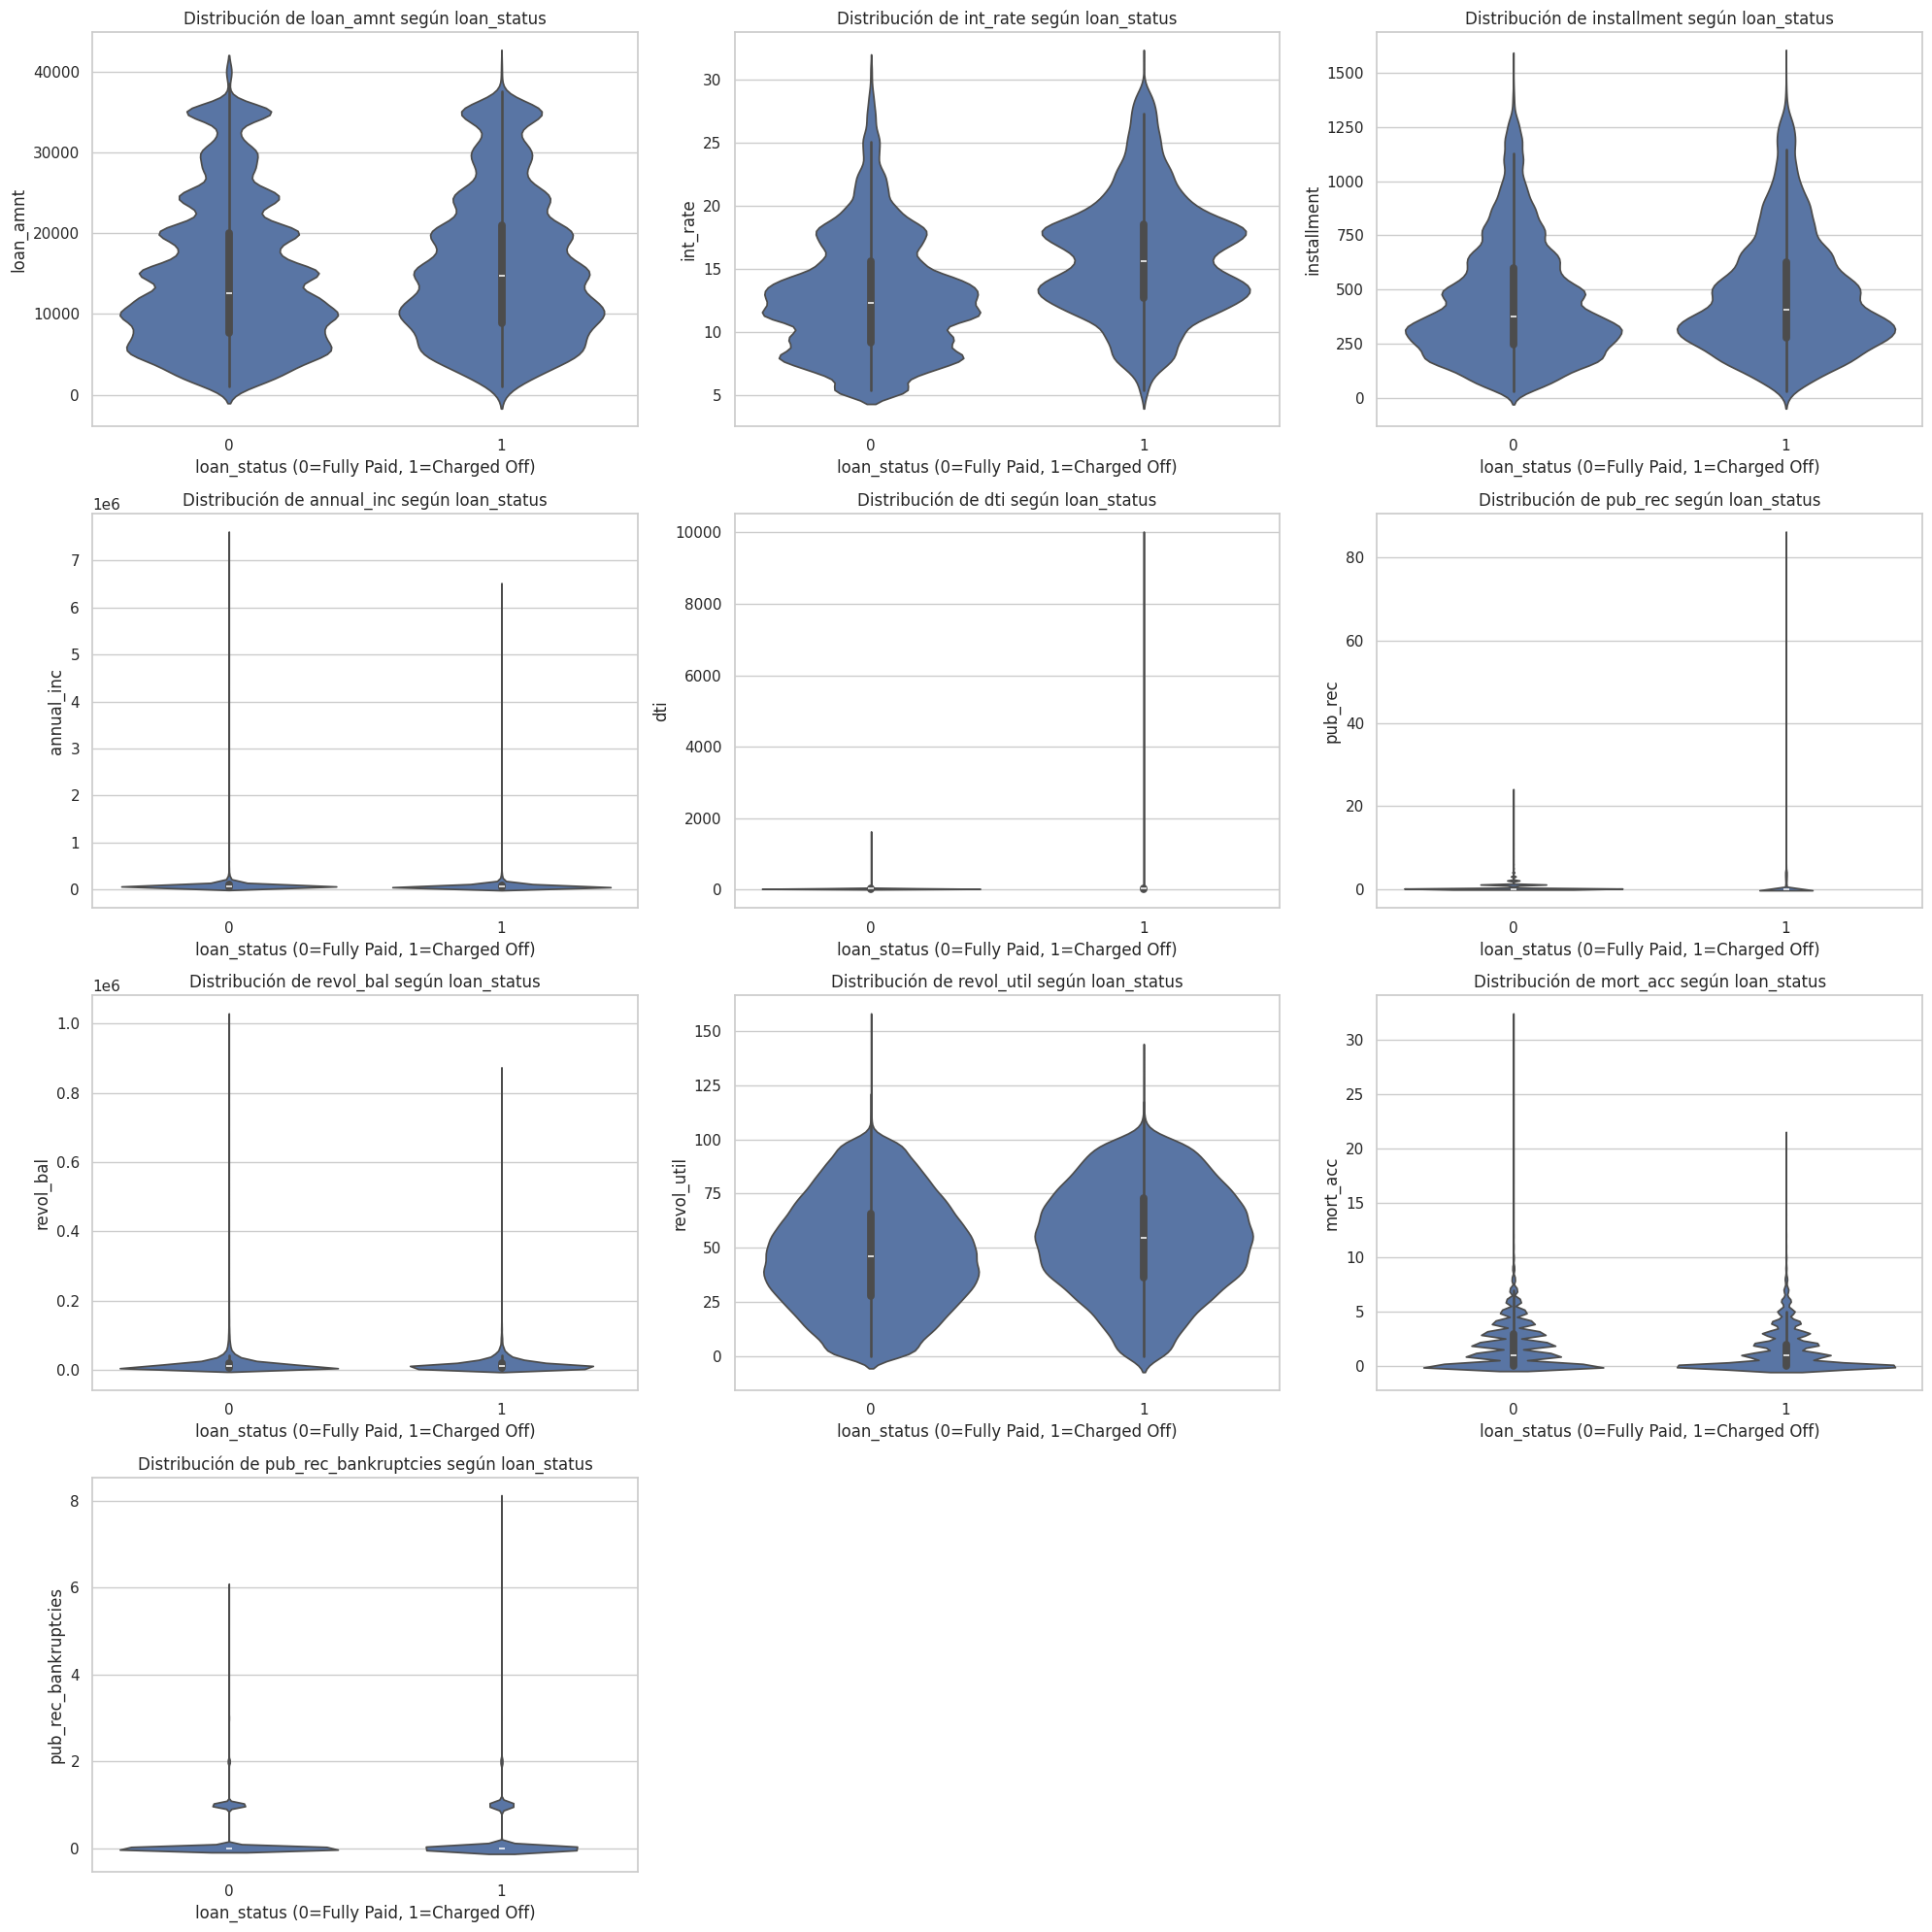

In [63]:
# Distribución de variables numéricas según loan_status
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.violinplot(data=df_final, x='loan_status', y=col, inner='box')
    plt.title(f'Distribución de {col} según loan_status')
    plt.xlabel('loan_status (0=Fully Paid, 1=Charged Off)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [64]:
# Definir variables X e y
X = df_final.drop(columns=['loan_status'])
y = df_final['loan_status']

In [65]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
# conversion de variables categóricas a numéricas por label encoding

# Asegurar que sub_grade esté presente en X_train y X_test
if 'sub_grade' in X_train.columns and 'sub_grade' in X_test.columns:
    le = LabelEncoder()

    # Fit con los datos de entrenamiento
    le.fit(X_train['sub_grade'])

    # Transformar en ambos sets
    X_train['sub_grade'] = le.transform(X_train['sub_grade'])
    X_test['sub_grade'] = le.transform(X_test['sub_grade'])

In [67]:
# Aplicación del OneHotEncoding a las variables categóricas restantes

# Columnas categóricas
columnas_categoricas = ["home_ownership", "verification_status", "purpose"]

# Instanciar el encoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar el encoder solo con X_train
encoder.fit(X_train[columnas_categoricas])

# Transformar X_train y X_test
X_train_encoded = encoder.transform(X_train[columnas_categoricas])
X_test_encoded = encoder.transform(X_test[columnas_categoricas])

# Obtener nombres de columnas codificadas
encoded_cols = encoder.get_feature_names_out(columnas_categoricas)

# Crear DataFrames con los resultados
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Eliminar columnas originales y concatenar las nuevas
X_train_final = pd.concat([X_train.drop(columns=columnas_categoricas), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(columns=columnas_categoricas), X_test_encoded_df], axis=1)

In [68]:
# Concatenar X_train con y_train
df_clean_train = pd.concat([X_train_final, y_train], axis=1)

# Exportar como CSV
path_data = "/workspaces/AK-EA-GG_ProyectoFinalDS-ML/data/processed/"

df_clean_train.to_csv(path_data + 'clean_train.csv', index=False)

In [69]:
# Concatenar X_test con y_test
df_clean_test = pd.concat([X_test_final, y_test], axis=1)

# Exportar como CSV
path_data = "/workspaces/AK-EA-GG_ProyectoFinalDS-ML/data/processed/"

df_clean_test.to_csv(path_data + 'clean_test.csv', index=False)

In [70]:
# Definir la ruta donde se guardará el encoder
encoder_dir = '/workspaces/AK-EA-GG_ProyectoFinalDS-ML/models'

# Guardar el encoder en un archivo .pkl
best_le_path = os.path.join(encoder_dir, 'label_encoder_sub_grade.pkl')
with open(best_le_path, 'wb') as f:
    pickle.dump(le, f)